In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [3]:
df = pd.read_csv("data.csv")
df.columns = df.columns.str.lower().str.replace(" ","_")

df["fbs"] = df["fbs"].map({True: 'true', False: 'false'})
df["exang"] = df["exang"].map({True: 'true', False: 'false'})

string = list(df.dtypes[df.dtypes == 'object'].index)

for c in string:
    df[c] = df[c].str.lower().str.replace(' ','_')
    
df["target"] = (df['num']>0).astype(int)

In [4]:
numerical = ['age',
 'trestbps',
 'chol',
 'thalch',
 'oldpeak',
 'ca'
 ]

categorical = [
 'sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'thal',
]

In [5]:
del df['num']
del df['id']
del df['dataset']

In [6]:
for n in numerical:
    df[n] = df[n].fillna(df[n].median())

for n in categorical:
    df[n] = df[n].fillna(df[n].mode()[0])

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,true,lv hypertrophy,150.0,false,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,false,lv hypertrophy,108.0,true,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,false,lv hypertrophy,129.0,true,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,false,normal,187.0,false,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,false,lv hypertrophy,172.0,false,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,true,st-t abnormality,154.0,false,0.0,flat,0.0,normal,1
916,62,Male,typical angina,130.0,139.0,false,st-t abnormality,140.0,false,0.5,flat,0.0,normal,0
917,55,Male,asymptomatic,122.0,223.0,true,st-t abnormality,100.0,false,0.0,flat,0.0,fixed defect,1
918,58,Male,asymptomatic,130.0,385.0,true,lv hypertrophy,140.0,false,0.5,flat,0.0,normal,0


In [9]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [10]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [11]:
len(df_train), len(df_val), len(df_test)

(552, 184, 184)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [13]:
y_train = df_train['target']
y_val = df_val['target']
y_test = df_test['target']

del df_train['target']
del df_val['target']
del df_test['target']

In [14]:
y_val

0      0
1      1
2      0
3      1
4      1
      ..
179    1
180    0
181    1
182    1
183    0
Name: target, Length: 184, dtype: int64

In [15]:
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,67,Female,non-anginal,152.0,277.0,false,normal,172.0,false,0.0,upsloping,1.0,normal
1,44,Male,atypical angina,130.0,219.0,false,lv hypertrophy,188.0,false,0.0,upsloping,0.0,normal
2,49,Female,atypical angina,124.0,201.0,false,normal,164.0,false,0.0,flat,0.0,normal
3,45,Male,typical angina,110.0,264.0,false,normal,132.0,false,1.2,flat,0.0,reversable defect
4,52,Male,asymptomatic,130.0,225.0,false,normal,120.0,true,2.0,flat,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,50,Male,asymptomatic,150.0,215.0,false,normal,140.0,true,0.0,flat,0.0,normal
548,55,Male,asymptomatic,140.0,229.0,false,normal,110.0,true,0.5,flat,0.0,normal
549,59,Male,asymptomatic,120.0,0.0,false,normal,115.0,false,0.0,flat,0.0,normal
550,45,Female,asymptomatic,138.0,236.0,false,lv hypertrophy,152.0,true,0.2,flat,0.0,normal


In [16]:
dv = DictVectorizer(sparse = False)

In [17]:
train_dicts= df_train[categorical + numerical].to_dict(orient = 'records')
val_dicts= df_val[categorical + numerical].to_dict(orient = 'records')

In [18]:
dv.fit(train_dicts)

,"dtype dtype: dtype, default=np.float64The type of feature values. Passed to Numpy array/scipy.sparse matrixconstructors as the dtype argument.",<class 'numpy.float64'>
,"separator separator: str, default=""=""Separator string used when constructing new features for one-hotcoding.",'='
,"sparse sparse: bool, default=TrueWhether transform should produce scipy.sparse matrices.",False
,"sort sort: bool, default=TrueWhether ``feature_names_`` and ``vocabulary_`` should besorted when fitting.",True


In [19]:
dv.get_feature_names_out()

array(['age', 'ca', 'chol', 'cp=asymptomatic', 'cp=atypical angina',
       'cp=non-anginal', 'cp=typical angina', 'exang=false', 'exang=true',
       'fbs=false', 'fbs=true', 'oldpeak', 'restecg=lv hypertrophy',
       'restecg=normal', 'restecg=st-t abnormality', 'sex=Female',
       'sex=Male', 'slope=downsloping', 'slope=flat', 'slope=upsloping',
       'thal=fixed defect', 'thal=normal', 'thal=reversable defect',
       'thalch', 'trestbps'], dtype=object)

In [20]:
dv.transform(train_dicts[:5])

array([[ 67. ,   1. , 277. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   1. ,   0. , 172. , 152. ],
       [ 44. ,   0. , 219. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ,
          0. ,   1. ,   0. ,   1. ,   0. , 188. , 130. ],
       [ 49. ,   0. , 201. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,   0. ,
          1. ,   0. ,   0. ,   1. ,   0. , 164. , 124. ],
       [ 45. ,   0. , 264. ,   0. ,   0. ,   0. ,   1. ,   1. ,   0. ,
          1. ,   0. ,   1.2,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   1. , 132. , 110. ],
       [ 52. ,   0. , 225. ,   1. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          1. ,   0. ,   2. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   1. ,   0. , 120. , 130. ]])

In [21]:
dv.transform(val_dicts[:5])

array([[ 71. ,   2. , 302. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0.4,   0. ,   1. ,   0. ,   1. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   1. ,   0. , 162. , 160. ],
       [ 46. ,   0. , 249. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0.8,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   1. , 144. , 120. ],
       [ 60. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          1. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   1. , 118. , 152. ],
       [ 60. ,   0. , 186. ,   1. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   1. ,   0.5,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   1. ,   0. , 140. , 130. ],
       [ 57. ,   0. , 270. ,   1. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   1. ,   2. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   1. ,   0. , 160. , 144. ]])

In [22]:
X_train = dv.fit_transform(train_dicts)

In [23]:
X_val = dv.transform(val_dicts)

In [24]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [25]:
y_pred = model.predict_proba(X_val)[:, 1]

In [26]:
target_decision = y_pred>=0.5

In [27]:
target_decision

array([False,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,

In [28]:
(y_val == target_decision).mean()

np.float64(0.8043478260869565)

In [29]:
df_pred = pd.DataFrame()

In [30]:
df_pred['probability'] = y_pred

In [31]:
df_pred['prediction'] = target_decision.astype(int)

In [32]:
df_pred['actual'] = y_val

In [33]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [34]:
df_pred

,probability,prediction,actual,correct
0,0.087452,0,0,True
1,0.509525,1,1,True
2,0.945822,1,0,False
3,0.879683,1,1,True
4,0.907861,1,1,True
...,...,...,...,...
179,0.707689,1,1,True
180,0.048146,0,0,True
181,0.731914,1,1,True
182,0.902533,1,1,True


In [35]:
df_pred.correct.mean()

np.float64(0.8043478260869565)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_val, y_pred>=0.5)

0.8043478260869565

Confusion table

In [38]:
y_val.sum()

np.int64(105)

In [39]:
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
t = 0.4
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [40]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [41]:
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])

In [42]:
confusion_matrix

array([[60, 19],
       [15, 90]])

In [43]:
confusion_matrix.sum()

np.int64(184)

In [44]:
(confusion_matrix/confusion_matrix.sum()).round(3)

array([[0.326, 0.103],
       [0.082, 0.489]])

# Precision and recall

In [45]:
(tp+tn)/(tp+tn+fp+fn)

np.float64(0.8152173913043478)

In [46]:
p = tp/(tp + fp)
p

np.float64(0.8256880733944955)

Of all the people we predicted ho have heart deaseas, only 82% actuall hade it.

In [47]:
r = tp/(tp + fn)
r

np.float64(0.8571428571428571)

we identified 85% people who actually had heart deaease, we missed 15%

# ROC curve

In [48]:
tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

In [49]:
tpr, fpr

(np.float64(0.8571428571428571), np.float64(0.24050632911392406))

In [50]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
  actual_positive = (y_val ==1)
  actual_negative = (y_val == 0)

  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  scores.append((t,tp,fp,fn, tn))

In [51]:
columns = ['threshold','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores, columns = columns)

df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)

In [52]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,105,79,0,0,1.000000,1.000000
10,0.1,101,54,4,25,0.961905,0.683544
20,0.2,97,39,8,40,0.923810,0.493671
30,0.3,93,24,12,55,0.885714,0.303797
40,0.4,90,19,15,60,0.857143,0.240506
50,0.5,86,17,19,62,0.819048,0.215190
60,0.6,79,15,26,64,0.752381,0.189873
70,0.7,69,9,36,70,0.657143,0.113924
80,0.8,57,7,48,72,0.542857,0.088608
90,0.9,38,5,67,74,0.361905,0.063291


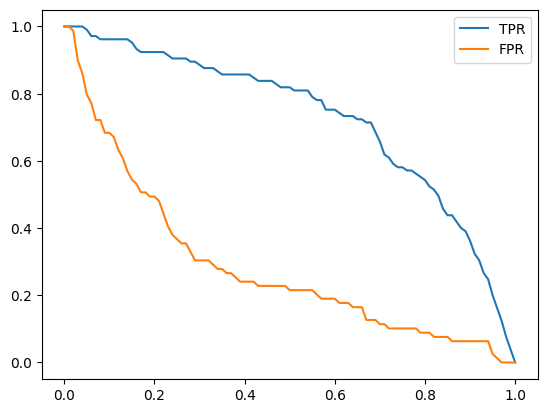

In [53]:
plt.plot(df_scores.threshold, df_scores.tpr, label= 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')
plt.legend()

# Random model

In [56]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size = len(y_val))

In [57]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , 0.302, 0.147, 0.092, 0.186, 0.346, 0.397,
       0.539, 0.419, 0.685, 0.204, 0.878, 0.027, 0.67 , 0.417, 0.559,
       0.14 , 0.198, 0.801, 0.968, 0.313, 0.692, 0.876, 0.895, 0.085,
       0.039, 0.17 , 0.878, 0.098, 0.421, 0.958, 0.533, 0.692, 0.316,
       0.687, 0.835, 0.018, 0.75 , 0.989, 0.748, 0.28 , 0.789, 0.103,
       0.448, 0.909, 0.294, 0.288, 0.13 , 0.019, 0.679, 0.212, 0.266,
       0.492, 0.053, 0.574, 0.147, 0.589, 0.7  , 0.102, 0.414, 0.694,
       0.414, 0.05 , 0.536, 0.664, 0.515, 0.945, 0.587, 0.903, 0.137,
       0.139, 0.807, 0.398, 0.165, 0.928, 0.348, 0.751, 0.726, 0.883,
       0.624, 0.751, 0.349, 0.27 , 0.896, 0.428, 0.965, 0.663, 0.622,
       0.115, 0.949, 0.45 , 0.578, 0.408, 0.237, 0.903, 0.574, 0.003,
       0.617, 0.327, 0.527, 0.886, 0.357, 0.909, 0.623, 0.016, 0.929,
       0.691, 0.997, 0.172, 0.137, 0.933, 0.697, 0.066, 0.755, 0.754,
       0.923, 0.712, 0.124, 0.02 , 0.026, 0.028, 0.246, 0.86 , 0.539,
       0.553, 0.842,

In [59]:
((y_rand >= 0.4) == y_val).mean()

np.float64(0.5054347826086957)

In [60]:
def tpr_fpr_dataframe(y_val, y_pred):
  scores = []

  thresholds = np.linspace(0,1,101)

  for t in thresholds:
    actual_positive = (y_val ==1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    scores.append((t,tp,fp,fn, tn))

  columns = ['threshold','tp','fp','fn','tn']
  df_scores = pd.DataFrame(scores, columns = columns)

  df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
  df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)

  return df_scores


In [61]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [62]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,105,79,0,0,1.000000,1.000000
10,0.1,93,66,12,13,0.885714,0.835443
20,0.2,81,56,24,23,0.771429,0.708861
30,0.3,71,49,34,30,0.676190,0.620253
40,0.4,60,46,45,33,0.571429,0.582278
50,0.5,54,39,51,40,0.514286,0.493671
60,0.6,40,31,65,48,0.380952,0.392405
70,0.7,30,21,75,58,0.285714,0.265823
80,0.8,20,16,85,63,0.190476,0.202532
90,0.9,9,10,96,69,0.085714,0.126582


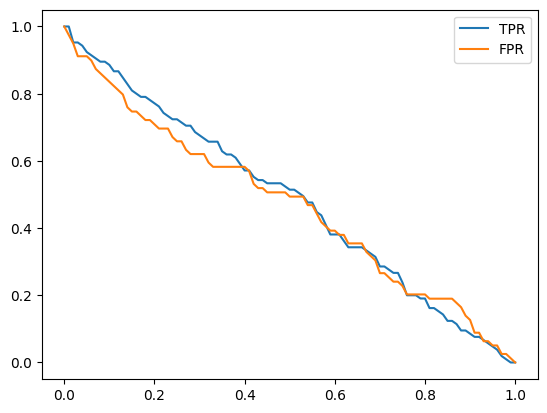

In [63]:
plt.plot(df_rand.threshold, df_rand.tpr, label = 'TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label = 'FPR')
plt.legend()

# ideal model

In [64]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(np.int64(79), np.int64(105))

In [65]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
y_ideal_pred = np.linspace(0,1, len(y_val))

In [68]:
1-y_val.mean()

np.float64(0.42934782608695654)

In [70]:
((y_ideal_pred >= 0.42934782608695654) == y_ideal).mean()

np.float64(1.0)

In [71]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [72]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,105,79,0,0,1.000000,1.000000
10,0.1,105,60,0,19,1.000000,0.759494
20,0.2,105,42,0,37,1.000000,0.531646
30,0.3,105,24,0,55,1.000000,0.303797
40,0.4,105,5,0,74,1.000000,0.063291
50,0.5,92,0,13,79,0.876190,0.000000
60,0.6,74,0,31,79,0.704762,0.000000
70,0.7,55,0,50,79,0.523810,0.000000
80,0.8,37,0,68,79,0.352381,0.000000
90,0.9,19,0,86,79,0.180952,0.000000


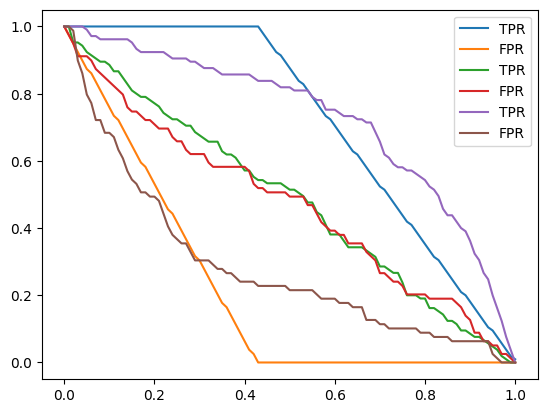

In [73]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'FPR')
plt.legend()

plt.plot(df_rand.threshold, df_rand.tpr, label = 'TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label = 'FPR')
plt.legend()

plt.plot(df_scores.threshold, df_scores.tpr, label= 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')
plt.legend()

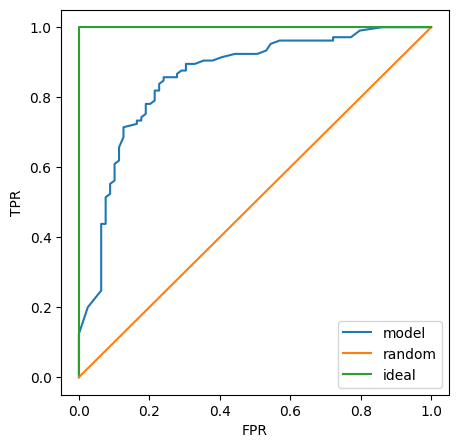

In [74]:
plt.figure(figsize = (5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot([0,1],[0,1],  label = 'random')
#plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr,  label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [75]:
from sklearn.metrics import roc_curve

In [76]:
roc_curve?

Signature:
roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: Support beyond :term:`binary` classification tasks, via one-vs-rest or
one-vs-one, is not implemented.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array-like of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).
    For :term:`decision_function` scores, values greater than or equal to
    zero should indicate the positive class.

pos_label : int, float, bool or str, default=None
    The label of the positive class.
    When ``pos_la

In [77]:
roc_curve(y_val, y_pred)

(array([0.        , 0.        , 0.        , 0.01265823, 0.01265823,
        0.02531646, 0.02531646, 0.03797468, 0.03797468, 0.05063291,
        0.05063291, 0.06329114, 0.06329114, 0.07594937, 0.07594937,
        0.08860759, 0.08860759, 0.10126582, 0.10126582, 0.11392405,
        0.11392405, 0.12658228, 0.12658228, 0.15189873, 0.15189873,
        0.16455696, 0.16455696, 0.17721519, 0.17721519, 0.18987342,
        0.18987342, 0.20253165, 0.20253165, 0.21518987, 0.21518987,
        0.2278481 , 0.2278481 , 0.24050633, 0.24050633, 0.27848101,
        0.27848101, 0.30379747, 0.30379747, 0.35443038, 0.35443038,
        0.37974684, 0.37974684, 0.43037975, 0.43037975, 0.53164557,
        0.53164557, 0.5443038 , 0.5443038 , 0.72151899, 0.72151899,
        0.78481013, 0.78481013, 0.79746835, 0.79746835, 0.86075949,
        0.86075949, 1.        ]),
 array([0.        , 0.00952381, 0.15238095, 0.15238095, 0.17142857,
        0.17142857, 0.2       , 0.2       , 0.20952381, 0.20952381,
        0.2380